In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [2]:
# creating a sample data standard scaler
data = {
    'age':[20,25,30,40,45],
    'height':[125, 130, 140, 150, 155],
    'weight':[61, 65, 75, 80, 85]
}
df = pd.DataFrame(data)
df

,age,height,weight
0,20,125,61
1,25,130,65
2,30,140,75
3,40,150,80
4,45,155,85


In [3]:
scaler = StandardScaler()

In [4]:
scaler_df = scaler.fit_transform(df)
scaler_df

array([[-1.29399328, -1.31558703, -1.35589038],
       [-0.75482941, -0.87705802, -0.91133616],
       [-0.21566555,  0.        ,  0.2000494 ],
       [ 0.86266219,  0.87705802,  0.75574218],
       [ 1.40182605,  1.31558703,  1.31143496]])

In [5]:
s_df = pd.DataFrame(scaler_df, columns=df.columns)
s_df

,age,height,weight
0,-1.293993,-1.315587,-1.355890
1,-0.754829,-0.877058,-0.911336
2,-0.215666,0.000000,0.200049
3,0.862662,0.877058,0.755742
4,1.401826,1.315587,1.311435


In [6]:
# creating a sample data min_max 
data = {
    'age':[20,25,30,40,45],
    'height':[125, 130, 140, 150, 155],
    'weight':[61, 65, 75, 80, 85]
}
df = pd.DataFrame(data)
df

,age,height,weight
0,20,125,61
1,25,130,65
2,30,140,75
3,40,150,80
4,45,155,85


In [7]:
min_max = MinMaxScaler()
min_max_df = min_max.fit_transform(df)
min_max_df

array([[0.        , 0.        , 0.        ],
       [0.2       , 0.16666667, 0.16666667],
       [0.4       , 0.5       , 0.58333333],
       [0.8       , 0.83333333, 0.79166667],
       [1.        , 1.        , 1.        ]])

In [8]:
mm_df = pd.DataFrame(min_max_df, columns=df.columns)
mm_df

,age,height,weight
0,0.0,0.000000,0.000000
1,0.2,0.166667,0.166667
2,0.4,0.500000,0.583333
3,0.8,0.833333,0.791667
4,1.0,1.000000,1.000000


In [9]:
# creating a sample data max_absolute 
data = {
    'age':[20,25,30,40,45],
    'height':[125, 130, 140, 150, 155],
    'weight':[61, 65, 75, 80, 85]
}
df = pd.DataFrame(data)
df

,age,height,weight
0,20,125,61
1,25,130,65
2,30,140,75
3,40,150,80
4,45,155,85


In [10]:
max_abs = MaxAbsScaler()
max_abs_df = max_abs.fit_transform(df)
max_abs_df

array([[0.44444444, 0.80645161, 0.71764706],
       [0.55555556, 0.83870968, 0.76470588],
       [0.66666667, 0.90322581, 0.88235294],
       [0.88888889, 0.96774194, 0.94117647],
       [1.        , 1.        , 1.        ]])

In [11]:
max_abdf = pd.DataFrame(max_abs_df, columns=df.columns)
max_abdf

,age,height,weight
0,0.444444,0.806452,0.717647
1,0.555556,0.838710,0.764706
2,0.666667,0.903226,0.882353
3,0.888889,0.967742,0.941176
4,1.000000,1.000000,1.000000


In [12]:
# convert your data to gussion distribution
import numpy as np
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [13]:
import seaborn as sns

<Axes: ylabel='Count'>

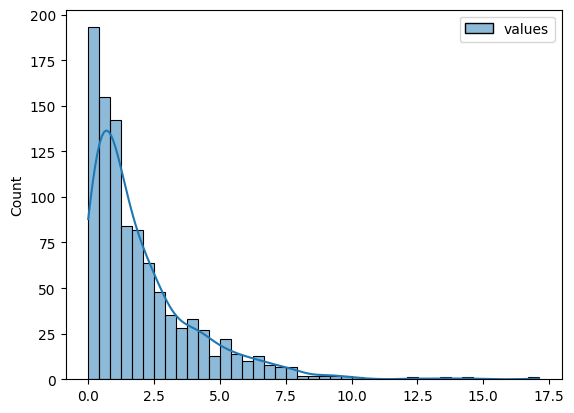

In [14]:
sns.histplot(df, kde=True)

*Data is Left skewed*

In [15]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
# data must be +ve for boxcox 
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo = PowerTransformer(method='yeo-johnson')
qt_nor = QuantileTransformer(output_distribution='normal')

In [16]:
df['box_cox'] = pt_boxcox.fit_transform(df[['values']]+1)
df['yeo'] = pt_yeo.fit_transform(df[['values']])
df['qt'] = qt_nor.fit_transform(df[['values']])

In [17]:
df.head()

,values,box_cox,yeo,qt
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677330,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


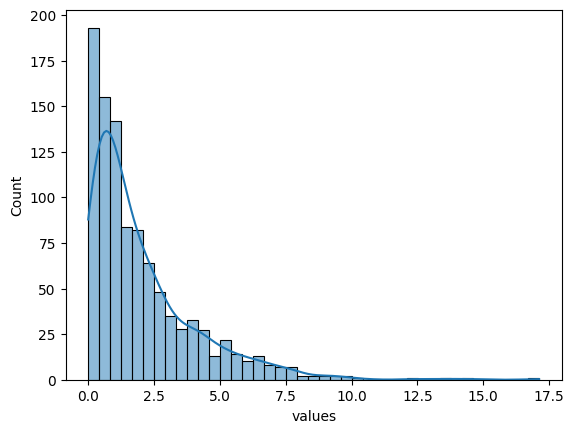

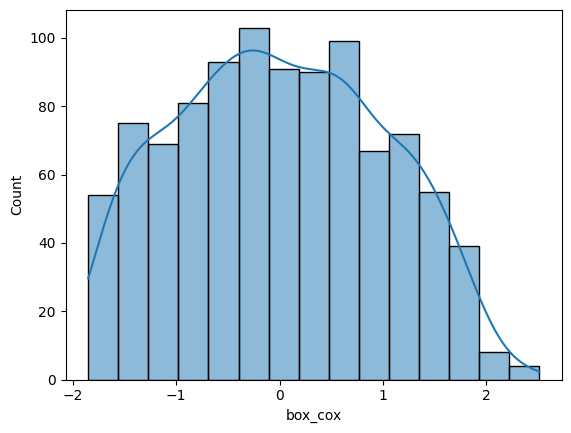

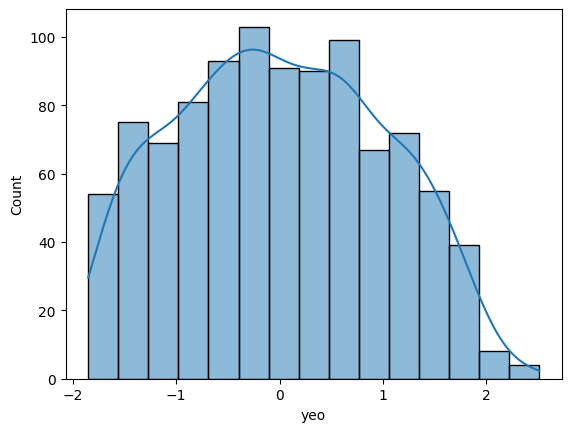

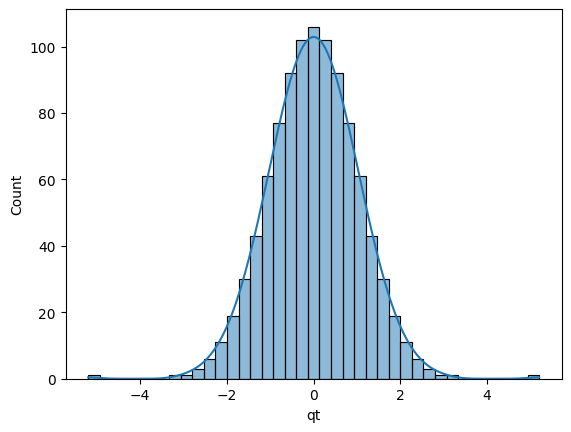

In [18]:
import matplotlib.pyplot as plt
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

# log

In [19]:
data = {
    'values':[1,5,10,50,100,300,500, 900, 1500, 3000, 6000, 8000, 100000]
}
df = pd.DataFrame(data)
df

,values
0,1
1,5
2,10
3,50
4,100
5,300
6,500
7,900
8,1500
9,3000


<Axes: ylabel='Count'>

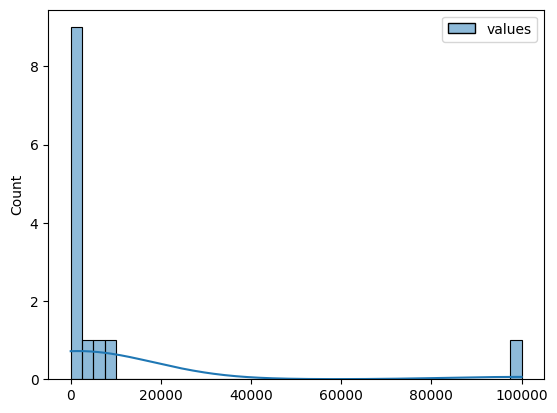

In [20]:
sns.histplot(df, kde=True)

In [21]:
import numpy as np
df['log_values'] =np.log(df['values'])
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,50,3.912023
4,100,4.605170
5,300,5.703782
6,500,6.214608
7,900,6.802395
8,1500,7.313220
9,3000,8.006368


<Axes: xlabel='log_values', ylabel='Count'>

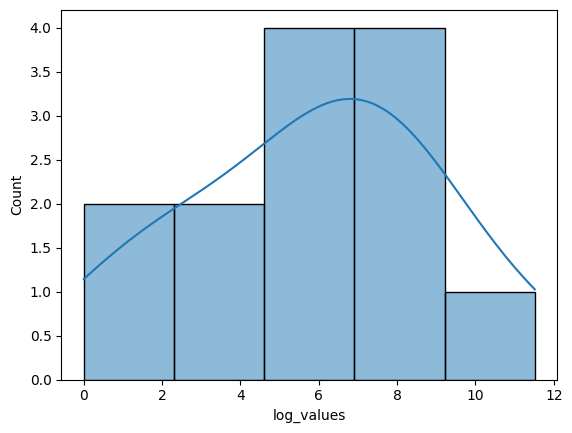

In [22]:
sns.histplot(df['log_values'], kde=True)

# Discritization

In [24]:
from sklearn.preprocessing import KBinsDiscretizer


In [25]:
df = sns.load_dataset('titanic')
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [26]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
df['age'] = df['age'].fillna(df['age'].mean())

In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
age_dis = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [30]:
df['age_bins'] = age_dis.fit_transform(df[['age']])

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


In [34]:
df['age_bins'].value_counts()

age_bins
1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

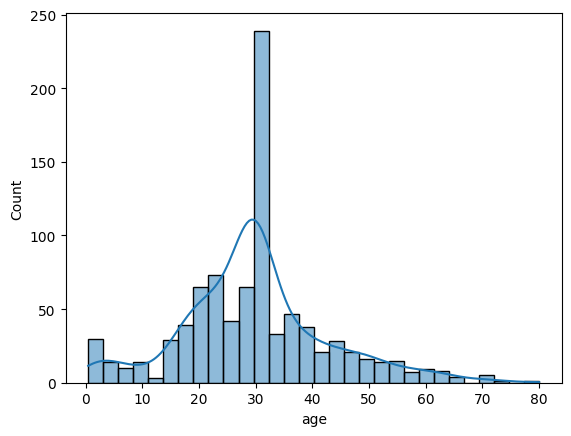

In [35]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='age_bins', ylabel='Count'>

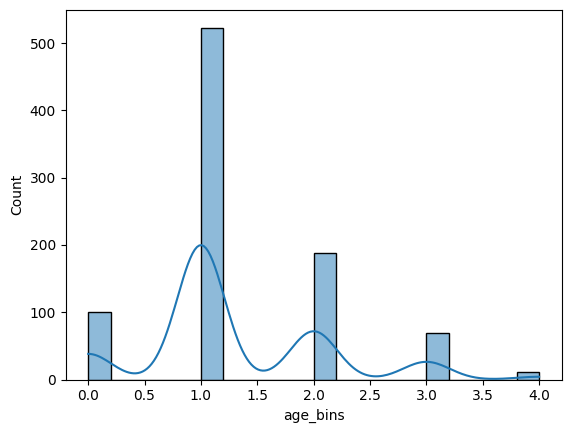

In [36]:
sns.histplot(df['age_bins'],kde=True)

<Axes: xlabel='age_bins_2', ylabel='Count'>

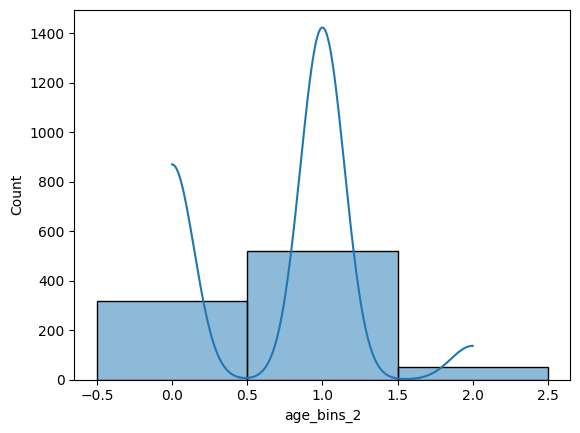

In [41]:
# Using Pandas
df['age_bins_2'] = pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df['age_bins_2'], kde=True)